In [1]:
import pandas as pd
s_data = pd.read_csv('Derate_Train_Clean.csv')

In [2]:
s_data.head()

,Timestamp,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,...,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA
0,2016-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.492436
1,2016-12-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196428
2,2016-12-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196442
3,2016-12-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.106935
4,2016-12-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866328


In [ ]:
#The task of this coding assignment is to identify the derated inverter(s) 
#on a day to day basis and report out the timestamps corresponding to the anomalies.

In [2]:
s_data.shape

(26496, 22)

In [4]:
s_data.columns

Index(['Timestamp', 'INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20', 'POA'],
      dtype='object')

In [25]:
print('data available from',s_data["Timestamp"].min(),' to ',s_data["Timestamp"].max())

data available from 2016-12-01 00:00:00  to  2017-11-30 23:50:00


<h2>Data Exploration</h2>

In [3]:
#Total 20 inverters and POA for irradiation.
#data available from 2016-12-01 00:00:00  to  2017-11-30 23:50:00
#Day wise plots
s_data['Timestamp'] = pd.to_datetime(s_data['Timestamp'])

In [14]:
s_data.head()

,Timestamp,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,...,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA
0,2016-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.492436
1,2016-12-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196428
2,2016-12-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196442
3,2016-12-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.106935
4,2016-12-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866328


In [4]:
s_data["date"] = [str(d.date()) for d in s_data["Timestamp"]]

In [26]:
s_data.isna().sum()

Timestamp      0
INV1          28
INV2          28
INV3          28
INV4          28
INV5          28
INV6          28
INV7          28
INV8          28
INV9          28
INV10         28
INV11         28
INV12         28
INV13         28
INV14         28
INV15         28
INV16         28
INV17         29
INV18         29
INV19         29
INV20         29
POA          135
date           0
dtype: int64

In [39]:
s_data.head()

,Timestamp,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,...,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA,date
0,2016-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.492436,2016-12-01
1,2016-12-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196428,2016-12-01
2,2016-12-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196442,2016-12-01
3,2016-12-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.106935,2016-12-01
4,2016-12-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866328,2016-12-01


In [27]:
s_data[s_data.POA.isna()]

,Timestamp,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,...,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA,date
6282,2017-03-13 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-13
6283,2017-03-13 16:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-13
6284,2017-03-13 16:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-13
6286,2017-03-13 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-13
6289,2017-03-13 17:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-13
6573,2017-03-15 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-15
6677,2017-03-16 09:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16
6713,2017-03-16 15:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16
6859,2017-03-17 16:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-17
7294,2017-03-20 16:40:00,1229.687170,1228.975100,1162.919355,1228.975100,1229.369910,1214.885054,1201.912773,1182.941539,1058.533916,...,1127.576525,920.226257,1229.754886,1216.691016,1229.834163,1214.141679,1142.787565,1229.263381,NaN,2017-03-20


In [5]:
s_data_all_rem = s_data[['Timestamp', 'date','INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20','POA' ]][~s_data[[ 'INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20', ]].isnull().all(1)].copy()

In [41]:
s_data_all_rem.isna().sum()

Timestamp      0
date           0
INV1           0
INV2           0
INV3           0
INV4           0
INV5           0
INV6           0
INV7           0
INV8           0
INV9           0
INV10          0
INV11          0
INV12          0
INV13          0
INV14          0
INV15          0
INV16          0
INV17          1
INV18          1
INV19          1
INV20          1
POA          107
dtype: int64

In [6]:
s_data_all_rem_new = s_data_all_rem[~s_data_all_rem.INV17.isna()].copy()

In [7]:
s_data_all_rem_new.isna().sum()

Timestamp      0
date           0
INV1           0
INV2           0
INV3           0
INV4           0
INV5           0
INV6           0
INV7           0
INV8           0
INV9           0
INV10          0
INV11          0
INV12          0
INV13          0
INV14          0
INV15          0
INV16          0
INV17          0
INV18          0
INV19          0
INV20          0
POA          107
dtype: int64

In [46]:
s_data_all_rem_new.describe()

,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,INV10,...,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA
count,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,...,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26467.000000,26360.000000
mean,371.945508,372.995607,366.015280,365.029344,378.847150,146.615021,368.356025,361.313572,366.207761,372.297331,...,296.591191,379.676231,355.020730,373.812248,375.093750,384.517153,381.530907,365.892861,376.614261,299.301021
std,474.894989,474.916148,465.331573,463.547022,479.834307,324.440780,467.341566,462.283756,465.613502,472.959204,...,451.121736,480.859673,469.439791,479.362415,478.592794,486.664346,483.239861,468.100254,477.837481,386.714206
min,-7.137347,-6.147434,-4.900112,-4.552775,-5.895423,-5.899311,-5.904876,-7.350187,-4.910731,-4.099733,...,-4.864566,-6.058282,-4.828028,-7.348592,-6.145924,-4.467493,-4.879873,-5.730647,-6.098421,-6.930542
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.823067
50%,10.207773,7.248740,7.268279,10.049043,9.901286,0.000000,11.952668,7.781915,8.882082,10.846787,...,0.000000,10.554030,3.416505,6.428212,9.717843,9.316742,9.120716,6.746894,10.703050,8.399465
75%,850.994876,850.873483,837.837465,831.797410,859.965829,7.760292,839.584494,830.872920,837.144351,848.012066,...,638.202286,862.609495,813.008416,853.987108,853.262726,878.023120,867.251161,838.083330,854.974246,635.143570
max,1233.495035,1237.176177,1239.352475,1233.950129,1237.932239,1247.290269,1232.413754,1239.339262,1233.293388,1243.587281,...,1232.567429,1240.707246,1237.614604,1241.962396,1234.964219,1233.342786,1235.613302,1235.628917,1236.612602,1084.393677


In [48]:
s_data_all_rem_new.head()

,Timestamp,date,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,...,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA
0,2016-12-01 00:00:00,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.492436
1,2016-12-01 00:10:00,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196428
2,2016-12-01 00:20:00,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.196442
3,2016-12-01 00:30:00,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.106935
4,2016-12-01 00:40:00,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866328


In [54]:
import seaborn as sns
df = s_data_all_rem_new[s_data_all_rem_new.date=='2016-12-01'][['Timestamp','INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20']].melt('Timestamp', var_name='cols',  value_name='vals')


In [80]:
s_data_all_rem_new[s_data_all_rem_new.date=='2016-12-01']

,Timestamp,date,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,...,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA
0,2016-12-01 00:00:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.492436
1,2016-12-01 00:10:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.196428
2,2016-12-01 00:20:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.196442
3,2016-12-01 00:30:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.106935
4,2016-12-01 00:40:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.866328
5,2016-12-01 00:50:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.154275
6,2016-12-01 01:00:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.941471
7,2016-12-01 01:10:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.395849
8,2016-12-01 01:20:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.716049
9,2016-12-01 01:30:00,2016-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.854044


In [122]:
range(0, len(unique_dates), 2)

range(0, 144, 2)

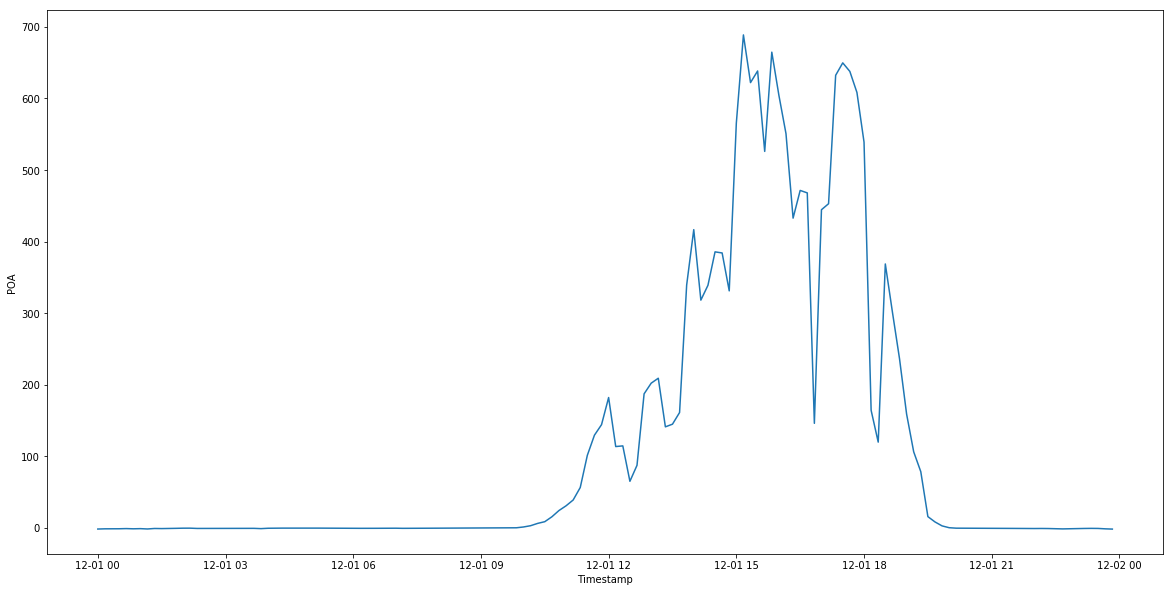

In [126]:
ax = sns.lineplot(x="Timestamp", y="POA",
                  data=s_data_all_rem_new[s_data_all_rem_new.date=='2016-12-01'])

#ax.set_xticks(list(date_ticks))
#ax.set_xticklabels(s_data_all_rem_new[s_data_all_rem_new.date=='2016-12-01']['Timestamp'].astype(str).tolist(), rotation=30) # set new labels
plt.show()

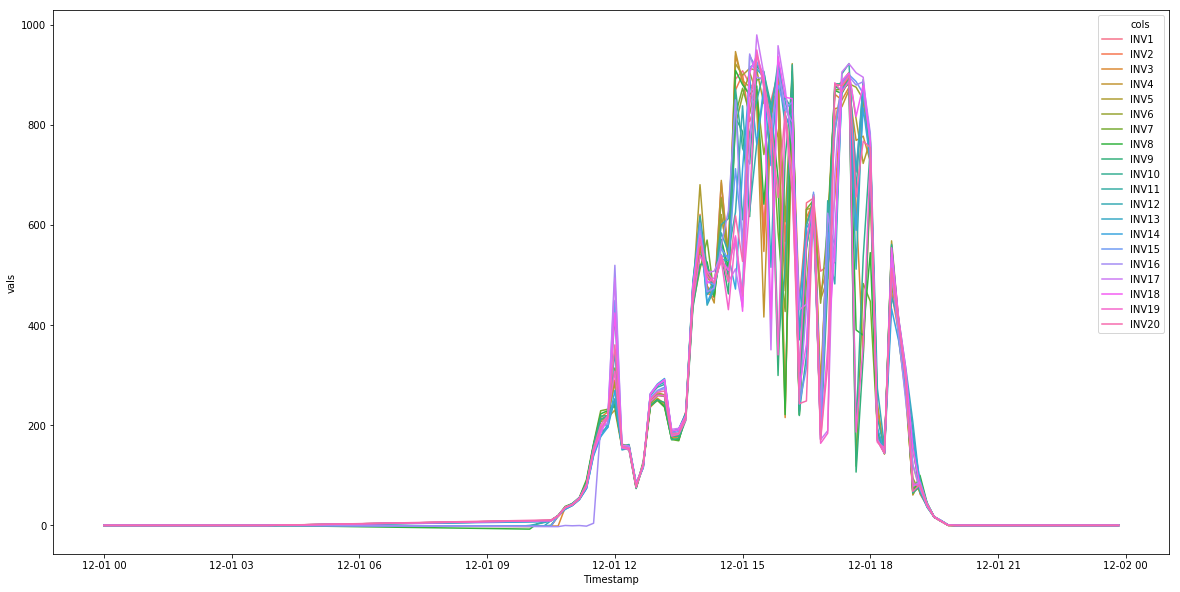

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
g = sns.lineplot(x="Timestamp", y="vals", hue='cols',data=df)
plt.show()

In [62]:
 s_data_all_rem_new[s_data_all_rem_new.date=='2016-12-01'][['Timestamp','INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20']]

,Timestamp,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,...,INV11,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20
0,2016-12-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-12-01 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2016-12-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-12-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2016-12-01 00:40:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2016-12-01 00:50:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2016-12-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2016-12-01 01:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2016-12-01 01:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2016-12-01 01:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
s_data_all_rem_new['Timestamp']=pd.to_datetime(s_data_all_rem_new['Timestamp'])

In [71]:
s_data_all_rem_new[(s_data_all_rem_new.Timestamp>pd.to_datetime('2016-12-01 03:40:00' )) & (s_data_all_rem_new.Timestamp<pd.to_datetime('2016-12-02 03:40:00'))]

,Timestamp,date,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,...,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,POA
23,2016-12-01 03:50:00,2016-12-01,-0.001253,0.005937,-0.002722,-0.005998,0.000000,0.000000,0.022374,-0.018071,...,-0.000193,-0.001223,0.007347,-0.001194,-0.000340,0.001420,0.001425,0.013466,0.021237,-0.909236
24,2016-12-01 04:00:00,2016-12-01,-0.031804,0.250446,-0.032561,-0.071754,0.000000,0.238862,0.267700,-0.216237,...,-0.033446,-0.032335,0.194337,-0.031593,-0.059246,0.247167,0.247892,0.253946,0.294481,-0.401080
25,2016-12-01 04:10:00,2016-12-01,-0.062355,0.494956,-0.062400,-0.137511,0.083472,0.484085,0.513026,-0.414402,...,-0.066700,-0.063447,0.381328,-0.061991,-0.118152,0.492913,0.494359,0.494426,0.567725,-0.248433
26,2016-12-01 04:20:00,2016-12-01,-0.092906,0.739466,-0.092239,-0.203268,0.308546,0.729309,0.758352,-0.612567,...,-0.099953,-0.094559,0.568318,-0.092389,-0.177058,0.738659,0.740827,0.734905,0.840970,-0.224662
27,2016-12-01 04:30:00,2016-12-01,-0.123457,0.983976,-0.122078,-0.269025,0.533621,0.974533,1.003678,-0.810733,...,-0.133206,-0.125671,0.755308,-0.122787,-0.235963,0.984405,0.987294,0.975385,1.114214,-0.200892
28,2016-12-01 04:40:00,2016-12-01,-0.154008,1.228485,-0.151917,-0.334781,0.758695,1.219756,1.249004,-1.008898,...,-0.166459,-0.156784,0.942298,-0.153185,-0.294869,1.230152,1.233761,1.215864,1.387459,-0.177122
29,2016-12-01 04:50:00,2016-12-01,-0.184559,1.472995,-0.181756,-0.400538,0.983769,1.464980,1.494330,-1.207063,...,-0.199713,-0.187896,1.129288,-0.183583,-0.353775,1.475898,1.480228,1.456344,1.660703,-0.153352
30,2016-12-01 05:00:00,2016-12-01,-0.215110,1.717505,-0.211595,-0.466295,1.208844,1.710204,1.739655,-1.405228,...,-0.232966,-0.219008,1.316278,-0.213981,-0.412680,1.721644,1.726696,1.696823,1.933948,-0.142974
31,2016-12-01 05:10:00,2016-12-01,-0.245661,1.962015,-0.241434,-0.532051,1.433918,1.955427,1.984981,-1.603394,...,-0.266219,-0.250120,1.503268,-0.244379,-0.471586,1.967390,1.973163,1.937303,2.207192,-0.214056
32,2016-12-01 05:20:00,2016-12-01,-0.276212,2.206524,-0.271273,-0.597808,1.658992,2.200651,2.230307,-1.801559,...,-0.299472,-0.281233,1.690258,-0.274778,-0.530492,2.213137,2.219631,2.177782,2.480437,-0.285137


In [10]:
s_data_all_rem_new["Hour"] = s_data_all_rem_new["Timestamp"].dt.hour

In [131]:
s_data_all_rem_new.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [135]:
#Hour level mean calculatoin
s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime('2016-12-01 00:00:00' )) & (s_data_all_rem_new.Timestamp<=pd.to_datetime('2016-12-02 00:00:00' )) & (s_data_all_rem_new.Hour>9)][['Timestamp','INV1','date','Hour']]

,Timestamp,INV1,date,Hour
60,2016-12-01 10:00:00,-1.131640,2016-12-01,10
61,2016-12-01 10:10:00,-1.162191,2016-12-01,10
62,2016-12-01 10:20:00,-1.192743,2016-12-01,10
63,2016-12-01 10:30:00,-1.223294,2016-12-01,10
64,2016-12-01 10:40:00,17.981606,2016-12-01,10
65,2016-12-01 10:50:00,34.196866,2016-12-01,10
66,2016-12-01 11:00:00,41.880809,2016-12-01,11
67,2016-12-01 11:10:00,53.627876,2016-12-01,11
68,2016-12-01 11:20:00,81.741107,2016-12-01,11
69,2016-12-01 11:30:00,157.670888,2016-12-01,11


In [9]:
s_data_all_rem_new['INV1'].loc[(s_data_all_rem_new['INV1'] <0)] = 0
s_data_all_rem_new['INV2'].loc[(s_data_all_rem_new['INV2'] <0)] = 0
s_data_all_rem_new['INV3'].loc[(s_data_all_rem_new['INV3'] <0)] = 0
s_data_all_rem_new['INV4'].loc[(s_data_all_rem_new['INV4'] <0)] = 0
s_data_all_rem_new['INV5'].loc[(s_data_all_rem_new['INV5'] <0)] = 0
s_data_all_rem_new['INV6'].loc[(s_data_all_rem_new['INV6'] <0)] = 0
s_data_all_rem_new['INV7'].loc[(s_data_all_rem_new['INV7'] <0)] = 0
s_data_all_rem_new['INV8'].loc[(s_data_all_rem_new['INV8'] <0)] = 0
s_data_all_rem_new['INV9'].loc[(s_data_all_rem_new['INV9'] <0)] = 0
s_data_all_rem_new['INV10'].loc[(s_data_all_rem_new['INV10'] <0)] = 0
s_data_all_rem_new['INV11'].loc[(s_data_all_rem_new['INV11'] <0)] = 0
s_data_all_rem_new['INV12'].loc[(s_data_all_rem_new['INV12'] <0)] = 0
s_data_all_rem_new['INV13'].loc[(s_data_all_rem_new['INV13'] <0)] = 0
s_data_all_rem_new['INV14'].loc[(s_data_all_rem_new['INV14'] <0)] = 0
s_data_all_rem_new['INV15'].loc[(s_data_all_rem_new['INV15'] <0)] = 0
s_data_all_rem_new['INV16'].loc[(s_data_all_rem_new['INV16'] <0)] = 0
s_data_all_rem_new['INV17'].loc[(s_data_all_rem_new['INV17'] <0)] = 0
s_data_all_rem_new['INV18'].loc[(s_data_all_rem_new['INV18'] <0)] = 0
s_data_all_rem_new['INV19'].loc[(s_data_all_rem_new['INV19'] <0)] = 0
s_data_all_rem_new['INV20'].loc[(s_data_all_rem_new['INV20'] <0)] = 0

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [144]:
#Hour level mean calculatoin
s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime('2016-12-01 00:00:00' )) & (s_data_all_rem_new.Timestamp<=pd.to_datetime('2016-12-02 00:00:00' )) & (s_data_all_rem_new.Hour>5)][['Timestamp','INV1','date','Hour']].head()

,Timestamp,INV1,date,Hour
36,2016-12-01 06:00:00,0.0,2016-12-01,6
37,2016-12-01 06:10:00,0.0,2016-12-01,6
38,2016-12-01 06:20:00,0.0,2016-12-01,6
39,2016-12-01 06:30:00,0.0,2016-12-01,6
40,2016-12-01 06:40:00,0.0,2016-12-01,6


In [176]:
#Since anamoly detection is a unsupervised learning, 
#where we need to detect the anamoly based on data points given over period of time
#Currently using one class svm to identify the anamoly out of 20 point given on a day level
s_data1 = s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime('2016-12-02 00:00:00' )) & (s_data_all_rem_new.Timestamp<=pd.to_datetime('2016-12-03 00:00:00' ))].copy()
#print(df_tr)

In [202]:

NextDay_Date = pd.to_datetime('2016-12-02 00:00:00' ) + datetime.timedelta(days=1)
print ('Next Date: ' + str(NextDay_Date))

Next Date: 2016-12-03 00:00:00


In [210]:

def return_transposed_mat(s_data1):
    s_data_12 = scaler.fit_transform(s_data1[['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
           'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
           'INV16', 'INV17', 'INV18', 'INV19', 'INV20']])
    s_data_12 = pd.DataFrame(s_data_12, columns = ['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
           'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
           'INV16', 'INV17', 'INV18', 'INV19', 'INV20'])
    return s_data_12.transpose().values

In [ ]:
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
scaler = MinMaxScaler() 
for i in s_data_all_rem_new.date.unique():
    curr_date = i + ' 00:00:00'
    NextDay_Date = pd.to_datetime(curr_date ) + datetime.timedelta(days=1)
    #print (curr_date,'  Next Date: ' + str(NextDay_Date))
    s_data_new = s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime(curr_date)) & (s_data_all_rem_new.Timestamp<=pd.to_datetime(NextDay_Date))][['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20']].copy()
    #print(s_data_new)
    train_data = return_transposed_mat(s_data_new)
    index_1 = s_data_new.transpose().index
    outlier_detection = DBSCAN(
     eps = .2,
         metric="euclidean",
         min_samples = 5,
     n_jobs = -1)
    clusters = outlier_detection.fit_predict(train_data)
    anamol_1 = np.take(index_1,np.where(clusters == 0)[0])
    print('Anamoly on ',i, ' are ', anamol_1)

Anamoly on  2016-12-01  are  Index([], dtype='object')
Anamoly on  2016-12-02  are  Index(['INV6', 'INV11', 'INV12', 'INV13', 'INV14', 'INV18', 'INV20'], dtype='object')
Anamoly on  2016-12-03  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV10',
       'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV17', 'INV18', 'INV20'],
      dtype='object')
Anamoly on  2016-12-04  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV10',
       'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17', 'INV18',
       'INV19', 'INV20'],
      dtype='object')
Anamoly on  2016-12-05  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV10',
       'INV11', 'INV12', 'INV14', 'INV15', 'INV19', 'INV20'],
      dtype='object')
Anamoly on  2016-12-06  are  Index([], dtype='object')
Anamoly on  2016-12-07  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9',
       'INV10', 'INV11', 'I

Anamoly on  2017-03-16  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9',
       'INV10', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17', 'INV18', 'INV19',
       'INV20'],
      dtype='object')
Anamoly on  2017-03-17  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9',
       'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17',
       'INV18', 'INV19', 'INV20'],
      dtype='object')
Anamoly on  2017-03-18  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9',
       'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17',
       'INV18', 'INV20'],
      dtype='object')
Anamoly on  2017-03-19  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7', 'INV8', 'INV9',
       'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17',
       'INV18', 'INV20'],
      dtype='object')
Anamoly on  2017-03-20  are  Index(['INV1', 'INV2', 'INV3', 

Anamoly on  2017-06-06  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV7', 'INV8', 'INV9', 'INV10',
       'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17', 'INV18',
       'INV19', 'INV20'],
      dtype='object')
Anamoly on  2017-06-07  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV7', 'INV8', 'INV9', 'INV10',
       'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17', 'INV18',
       'INV19', 'INV20'],
      dtype='object')
Anamoly on  2017-06-08  are  Index(['INV1', 'INV5', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV20'],
      dtype='object')
Anamoly on  2017-06-09  are  Index([], dtype='object')
Anamoly on  2017-06-10  are  Index(['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV7', 'INV8', 'INV9', 'INV10',
       'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 'INV17', 'INV18',
       'INV19', 'INV20'],
      dtype='object')
Anamoly on  2017-06-11  are  Index([], dtype='object')
Anamoly on

In [221]:
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
rs=np.random.RandomState(0)
scaler = MinMaxScaler() 
for i in s_data_all_rem_new.date.unique():
    curr_date = i + ' 00:00:00'
    NextDay_Date = pd.to_datetime(curr_date ) + datetime.timedelta(days=1)
    #print (curr_date,'  Next Date: ' + str(NextDay_Date))
    s_data_new = s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime(curr_date)) & (s_data_all_rem_new.Timestamp<=pd.to_datetime(NextDay_Date))][['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20']].copy()
    #print(s_data_new)
    train_data = return_transposed_mat(s_data_new)
    index_1 = s_data_new.transpose().index
    rs=np.random.RandomState(0)
    clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
    clf.fit(train_data)
    if_scores = clf.decision_function(train_data)
    if_anomalies=clf.predict(train_data)
    if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
    anamol_1 = np.take(index_1,np.where(if_anomalies == 1)[0])
    print('Anamoly on ',i, ' are ', anamol_1)

Anamoly on  2016-12-01  are  Index(['INV4', 'INV16'], dtype='object')
Anamoly on  2016-12-02  are  Index(['INV15', 'INV16'], dtype='object')
Anamoly on  2016-12-03  are  Index(['INV14', 'INV16'], dtype='object')
Anamoly on  2016-12-04  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2016-12-05  are  Index(['INV14', 'INV16'], dtype='object')
Anamoly on  2016-12-06  are  Index(['INV1', 'INV19'], dtype='object')
Anamoly on  2016-12-07  are  Index(['INV7', 'INV16'], dtype='object')
Anamoly on  2016-12-08  are  Index(['INV9', 'INV10'], dtype='object')
Anamoly on  2016-12-09  are  Index(['INV3', 'INV9'], dtype='object')
Anamoly on  2016-12-10  are  Index(['INV3', 'INV9'], dtype='object')
Anamoly on  2016-12-11  are  Index(['INV17', 'INV20'], dtype='object')
Anamoly on  2016-12-12  are  Index(['INV1', 'INV3'], dtype='object')
Anamoly on  2016-12-13  are  Index(['INV2', 'INV14'], dtype='object')
Anamoly on  2016-12-14  are  Index(['INV4', 'INV20'], dtype='object')
Anamoly on  2016-12

KeyboardInterrupt: 

In [216]:
#Isolation Forests


#if_anomalies=num[if_anomalies==1]

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:250: UserWarning: max_samples (100) is greater than the total number of samples (20). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [219]:
np.where(if_anomalies==1)

(array([5, 7], dtype=int64),)

In [227]:
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
import warnings
warnings.filterwarnings("ignore")
rs=np.random.RandomState(0)
from sklearn.neighbors import LocalOutlierFactor
scaler = MinMaxScaler() 
for i in s_data_all_rem_new.date.unique():
    curr_date = i + ' 00:00:00'
    NextDay_Date = pd.to_datetime(curr_date ) + datetime.timedelta(days=1)
    #print (curr_date,'  Next Date: ' + str(NextDay_Date))
    s_data_new = s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime(curr_date)) & (s_data_all_rem_new.Timestamp<=pd.to_datetime(NextDay_Date))][['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20']].copy()
    #print(s_data_new)
    train_data = return_transposed_mat(s_data_new)
    index_1 = s_data_new.transpose().index
    rs=np.random.RandomState(0)
    clf1 = LocalOutlierFactor(n_neighbors=10, contamination=.1)
    y_pred = clf1.fit_predict(train_data)
    LOF_Scores = clf1.negative_outlier_factor_
    LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
    anamol_1 = np.take(index_1,np.where(LOF_pred == 1)[0])
    print('Anamoly on ',i, ' are ', anamol_1)

Anamoly on  2016-12-01  are  Index(['INV9', 'INV19'], dtype='object')
Anamoly on  2016-12-02  are  Index(['INV2', 'INV16'], dtype='object')
Anamoly on  2016-12-03  are  Index(['INV16', 'INV19'], dtype='object')
Anamoly on  2016-12-04  are  Index(['INV9', 'INV16'], dtype='object')
Anamoly on  2016-12-05  are  Index(['INV9', 'INV16'], dtype='object')
Anamoly on  2016-12-06  are  Index(['INV12', 'INV14'], dtype='object')
Anamoly on  2016-12-07  are  Index(['INV12', 'INV16'], dtype='object')
Anamoly on  2016-12-08  are  Index(['INV9', 'INV10'], dtype='object')
Anamoly on  2016-12-09  are  Index(['INV7', 'INV9'], dtype='object')
Anamoly on  2016-12-10  are  Index(['INV1', 'INV2'], dtype='object')
Anamoly on  2016-12-11  are  Index(['INV13', 'INV18'], dtype='object')
Anamoly on  2016-12-12  are  Index(['INV14', 'INV19'], dtype='object')
Anamoly on  2016-12-13  are  Index(['INV2', 'INV19'], dtype='object')
Anamoly on  2016-12-14  are  Index(['INV2', 'INV14'], dtype='object')
Anamoly on  2016-

Anamoly on  2017-08-06  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-07  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-08  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-09  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-10  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-11  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-12  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-13  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-14  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-15  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-16  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-17  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-18  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-19  are  Index(['INV6', 'INV12'], dtype='object')
Anamoly on  2017-08-

In [231]:
#One class svm
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm
scaler = MinMaxScaler() 
for i in s_data_all_rem_new.date.unique():
    curr_date = i + ' 00:00:00'
    NextDay_Date = pd.to_datetime(curr_date ) + datetime.timedelta(days=1)
    #print (curr_date,'  Next Date: ' + str(NextDay_Date))
    s_data_new = s_data_all_rem_new[(s_data_all_rem_new.Timestamp>=pd.to_datetime(curr_date)) & (s_data_all_rem_new.Timestamp<=pd.to_datetime(NextDay_Date))][['INV1', 'INV2', 'INV3', 'INV4', 'INV5', 'INV6', 'INV7',
       'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15',
       'INV16', 'INV17', 'INV18', 'INV19', 'INV20']].copy()
    #print(s_data_new)
    train_data = return_transposed_mat(s_data_new)
    index_1 = s_data_new.transpose().index
    rs=np.random.RandomState(0)
    clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
    clf.fit(train_data)
    y_pred=clf.predict(train_data)
    LOF_Scores = clf1.negative_outlier_factor_
    LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
    anamol_1 = np.take(index_1,np.where(LOF_pred == 1)[0])
    print('Anamoly on ',i, ' are ', anamol_1)



Anamoly on  2016-12-01  are  Index(['INV4', 'INV7', 'INV16', 'INV17'], dtype='object')
Anamoly on  2016-12-02  are  Index(['INV2', 'INV7', 'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13',
       'INV14', 'INV15', 'INV16', 'INV17', 'INV18', 'INV19', 'INV20'],
      dtype='object')
Anamoly on  2016-12-03  are  Index(['INV1', 'INV2', 'INV3', 'INV6', 'INV9', 'INV10', 'INV11', 'INV12',
       'INV13', 'INV14', 'INV15', 'INV16', 'INV17', 'INV18', 'INV19', 'INV20'],
      dtype='object')
Anamoly on  2016-12-04  are  Index(['INV3', 'INV9', 'INV10', 'INV11', 'INV13', 'INV14', 'INV15', 'INV16',
       'INV17', 'INV18', 'INV19', 'INV20'],
      dtype='object')
Anamoly on  2016-12-05  are  Index(['INV5', 'INV7', 'INV9', 'INV10', 'INV13', 'INV15', 'INV16', 'INV17',
       'INV19', 'INV20'],
      dtype='object')
Anamoly on  2016-12-06  are  Index(['INV2', 'INV3', 'INV5', 'INV7', 'INV9', 'INV11', 'INV12', 'INV13',
       'INV14', 'INV15', 'INV17', 'INV18', 'INV19', 'INV20'],
      dtype='object')

Anamoly on  2017-03-25  are  Index(['INV1', 'INV2', 'INV7', 'INV8', 'INV14', 'INV17'], dtype='object')
Anamoly on  2017-03-26  are  Index(['INV5', 'INV10', 'INV14', 'INV17', 'INV18'], dtype='object')
Anamoly on  2017-03-27  are  Index(['INV7', 'INV8', 'INV10', 'INV11', 'INV12', 'INV14', 'INV16'], dtype='object')
Anamoly on  2017-03-28  are  Index(['INV5', 'INV11', 'INV14', 'INV16', 'INV17', 'INV18'], dtype='object')
Anamoly on  2017-03-29  are  Index(['INV5', 'INV11', 'INV14', 'INV16', 'INV17'], dtype='object')
Anamoly on  2017-03-30  are  Index(['INV1', 'INV2', 'INV8', 'INV9', 'INV11', 'INV12', 'INV13', 'INV14',
       'INV15', 'INV16', 'INV17', 'INV18', 'INV19', 'INV20'],
      dtype='object')
Anamoly on  2017-03-31  are  Index(['INV5', 'INV14', 'INV17', 'INV18'], dtype='object')
Anamoly on  2017-05-01  are  Index(['INV11', 'INV16', 'INV17'], dtype='object')
Anamoly on  2017-05-02  are  Index(['INV7', 'INV9', 'INV11', 'INV12', 'INV15', 'INV16', 'INV17', 'INV18'], dtype='object')
Anam

Anamoly on  2017-08-09  are  Index(['INV1', 'INV2', 'INV5', 'INV6', 'INV7', 'INV8', 'INV11', 'INV12',
       'INV16', 'INV17', 'INV18'],
      dtype='object')
Anamoly on  2017-08-10  are  Index(['INV11'], dtype='object')
Anamoly on  2017-08-11  are  Index(['INV2', 'INV6', 'INV7', 'INV11', 'INV12', 'INV16'], dtype='object')
Anamoly on  2017-08-12  are  Index(['INV5'], dtype='object')
Anamoly on  2017-08-13  are  Index(['INV5', 'INV7', 'INV8'], dtype='object')
Anamoly on  2017-08-14  are  Index(['INV5', 'INV6', 'INV10', 'INV11', 'INV12', 'INV13', 'INV15', 'INV16',
       'INV17', 'INV18', 'INV20'],
      dtype='object')
Anamoly on  2017-08-15  are  Index(['INV5'], dtype='object')
Anamoly on  2017-08-16  are  Index(['INV1', 'INV2', 'INV5', 'INV6', 'INV11', 'INV12', 'INV13', 'INV14',
       'INV17', 'INV18'],
      dtype='object')
Anamoly on  2017-08-17  are  Index(['INV2', 'INV6', 'INV7', 'INV8', 'INV9', 'INV10', 'INV12', 'INV13',
       'INV14', 'INV15', 'INV17', 'INV18', 'INV20'],
     

In [230]:
y_pred

array([ 1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [11]:
s_data_all_rem_new.to_csv('s_data_all_rem_new.csv')